In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np


In [15]:
image = mpimg.imread('Path.jpeg')
path = np.zeros((len(image), len(image)))
for i in range(len(image)):
    for j in range(len(image[0])):
        if image[i][j][0] > 100:
            path[i][j] = 0
        else:
            path[i][j] = 1

In [ ]:
arr = []
if (len(arr) == 0):
    print('Arr is empty!')

In [57]:
path = [[1, 1, 1, 1, 1],
        [0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],]

path[0][0] = 2
path[4][4] = 2

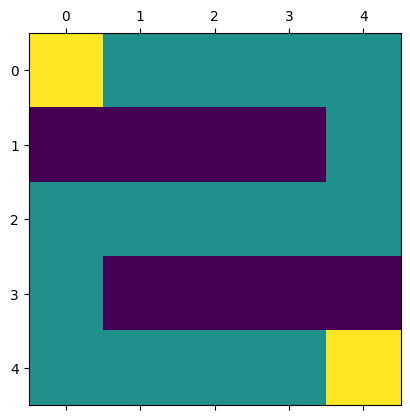

In [58]:
plt.matshow(path)
plt.show()

In [53]:
np.savetxt('in_path.txt',path, fmt='%d')

In [30]:
result = np.loadtxt('out_path.txt')

In [5]:
class Person():
    def __init__(self, name, age):
        self.name = name
        self.age = age

a = Person('jon', 20)
b = Person('den', 22)
c = Person('kate', 10)

arr = [a, b]
arr.append(c)

for i in range(len(arr)):
    print(arr[i].name)

jon
den
kate


In [3]:
import math
import heapq

# Define the Cell class
class Cell:
	def __init__(self):
		self.parent_i = 0 # Parent cell's row index
		self.parent_j = 0 # Parent cell's column index
		self.f = float('inf') # Total cost of the cell (g + h)
		self.g = float('inf') # Cost from start to this cell
		self.h = 0 # Heuristic cost from this cell to destination

# Define the size of the grid
ROW = 9
COL = 10

# Check if a cell is valid (within the grid)
def is_valid(row, col):
	return (row >= 0) and (row < ROW) and (col >= 0) and (col < COL)

# Check if a cell is unblocked
def is_unblocked(grid, row, col):
	return grid[row][col] == 1

# Check if a cell is the destination
def is_destination(row, col, dest):
	return row == dest[0] and col == dest[1]

# Calculate the heuristic value of a cell (Euclidean distance to destination)
def calculate_h_value(row, col, dest):
	return ((row - dest[0]) ** 2 + (col - dest[1]) ** 2) ** 0.5

# Trace the path from source to destination
def trace_path(cell_details, dest):
	print("The Path is ")
	path = []
	row = dest[0]
	col = dest[1]

	# Trace the path from destination to source using parent cells
	while not (cell_details[row][col].parent_i == row and cell_details[row][col].parent_j == col):
		path.append((row, col))
		temp_row = cell_details[row][col].parent_i
		temp_col = cell_details[row][col].parent_j
		row = temp_row
		col = temp_col

	# Add the source cell to the path
	path.append((row, col))
	# Reverse the path to get the path from source to destination
	path.reverse()

	# Print the path
	for i in path:
		print("->", i, end=" ")
	print()

# Implement the A* search algorithm
def a_star_search(grid, src, dest):
	# Check if the source and destination are valid
	if not is_valid(src[0], src[1]) or not is_valid(dest[0], dest[1]):
		print("Source or destination is invalid")
		return

	# Check if the source and destination are unblocked
	if not is_unblocked(grid, src[0], src[1]) or not is_unblocked(grid, dest[0], dest[1]):
		print("Source or the destination is blocked")
		return

	# Check if we are already at the destination
	if is_destination(src[0], src[1], dest):
		print("We are already at the destination")
		return

	# Initialize the closed list (visited cells)
	closed_list = [[False for _ in range(COL)] for _ in range(ROW)]
	# Initialize the details of each cell
	cell_details = [[Cell() for _ in range(COL)] for _ in range(ROW)]

	# Initialize the start cell details
	i = src[0]
	j = src[1]
	cell_details[i][j].f = 0
	cell_details[i][j].g = 0
	cell_details[i][j].h = 0
	cell_details[i][j].parent_i = i
	cell_details[i][j].parent_j = j

	# Initialize the open list (cells to be visited) with the start cell
	open_list = []
	heapq.heappush(open_list, (0.0, i, j))

	# Initialize the flag for whether destination is found
	found_dest = False

	# Main loop of A* search algorithm
	while len(open_list) > 0:
		# Pop the cell with the smallest f value from the open list
		p = heapq.heappop(open_list)

		# Mark the cell as visited
		i = p[1]
		j = p[2]
		closed_list[i][j] = True

		# For each direction, check the successors
		directions = [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)]
		for dir in directions:
			new_i = i + dir[0]
			new_j = j + dir[1]

			# If the successor is valid, unblocked, and not visited
			if is_valid(new_i, new_j) and is_unblocked(grid, new_i, new_j) and not closed_list[new_i][new_j]:
				# If the successor is the destination
				if is_destination(new_i, new_j, dest):
					# Set the parent of the destination cell
					cell_details[new_i][new_j].parent_i = i
					cell_details[new_i][new_j].parent_j = j
					print("The destination cell is found")
					# Trace and print the path from source to destination
					trace_path(cell_details, dest)
					found_dest = True
					return
				else:
					# Calculate the new f, g, and h values
					g_new = cell_details[i][j].g + 1.0
					h_new = calculate_h_value(new_i, new_j, dest)
					f_new = g_new + h_new

					# If the cell is not in the open list or the new f value is smaller
					if cell_details[new_i][new_j].f == float('inf') or cell_details[new_i][new_j].f > f_new:
						# Add the cell to the open list
						heapq.heappush(open_list, (f_new, new_i, new_j))
						# Update the cell details
						cell_details[new_i][new_j].f = f_new
						cell_details[new_i][new_j].g = g_new
						cell_details[new_i][new_j].h = h_new
						cell_details[new_i][new_j].parent_i = i
						cell_details[new_i][new_j].parent_j = j

	# If the destination is not found after visiting all cells
	if not found_dest:
		print("Failed to find the destination cell")

def main():
	# Define the grid (1 for unblocked, 0 for blocked)
	grid = [
		[1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
		[1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
		[1, 1, 1, 0, 1, 1, 0, 1, 0, 1],
		[0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
		[1, 1, 1, 0, 1, 1, 1, 0, 1, 0],
		[1, 0, 1, 1, 1, 1, 0, 1, 0, 0],
		[1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
		[1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
		[1, 1, 1, 0, 0, 0, 1, 0, 0, 1]
	]

	# Define the source and destination
	src = [8, 0]
	dest = [0, 0]

	# Run the A* search algorithm
	a_star_search(grid, src, dest)

if __name__ == "__main__":
	main()


The destination cell is found
The Path is 
-> (8, 0) -> (7, 0) -> (6, 0) -> (5, 0) -> (4, 1) -> (3, 2) -> (2, 1) -> (1, 0) -> (0, 0) 
